In [24]:
# Importing pandas library for data manipulation and analysis
import pandas as pd 
# Importing matplotlib for data visualization
import matplotlib.pyplot as plt  # Importing numpy for numerical computing
import numpy as np  
# Importing seaborn for statistical data visualization
import seaborn as sns  
# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler  
# Importing LinearRegression for linear regression modeling
from sklearn.linear_model import LinearRegression  
# Importing linregress for linear regression analysis
from scipy.stats import linregress  
# Importing KMeans for k-means clustering
from sklearn.cluster import KMeans  
# Importing silhouette_score for silhouette analysis
from sklearn.metrics import silhouette_score  


In [3]:
# Load the dataset
data = pd.read_csv("Economic Development Analysis.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display information about the dataset
print("\nDataset info:")
print(data.info())

First few rows of the dataset:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 no

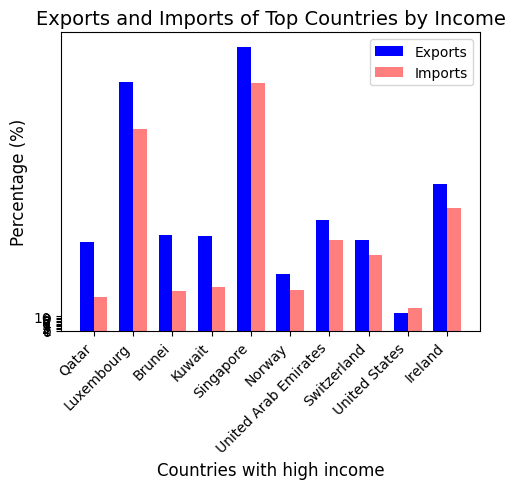

In [4]:
# Bar chart for exports and imports of the top countries based on income.

def plot_exports_vs_imports_top_countries(data, num_countries=10):
    """
    Generate a combined bar chart for exports and imports of the top countries based on income.
    
    Args:
    - data: DataFrame containing the dataset with 'country', 'exports', 'imports', and 'income' columns
    - num_countries: Number of top countries to display
    
    Returns:
    None
    """
    # Sort countries based on income
    top_countries = data.sort_values(by='income', ascending=False).head(num_countries)
    
    # Extract data for plotting
    countries = top_countries['country']
    exports = top_countries['exports']
    imports = top_countries['imports']
    
    # Set width of bar
    bar_width = 0.35
    
    # Set index for countries
    ind = np.arange(num_countries)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Plot bars for exports and imports
    ax.bar(ind - bar_width/2, exports, width=bar_width, label='Exports', color='blue')
    ax.bar(ind + bar_width/2, imports, width=bar_width, label='Imports', color='red', alpha=0.5)
    
    # Add labels, title, and legend
    ax.set_xlabel('Countries with high income', fontsize=12)
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.set_title('Exports and Imports of Top Countries by Income', fontsize=14)
    ax.set_xticks(ind)
    ax.set_xticklabels(countries, rotation=45, ha='right')
    ax.set_yticks(range(0, 11, 1))  # Set y-axis ticks from 0 to 100 with intervals of 10
    ax.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()
   

# Call the function to generate the combined bar chart for exports and imports of top countries by income
plot_exports_vs_imports_top_countries(data, num_countries=10)


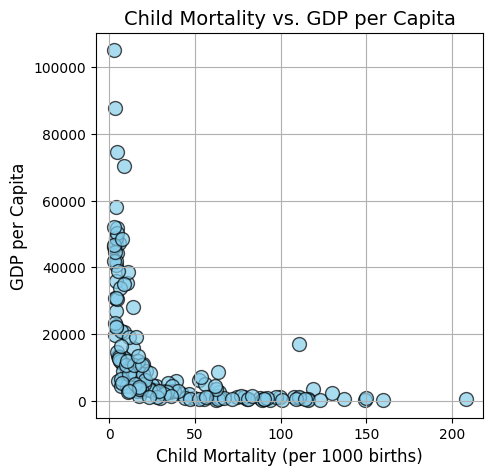

In [5]:
def plot_child_mortality_vs_gdp(data):
    """
    Generate a scatter plot of child mortality vs. GDP per capita.
    
    Args:
    - data: DataFrame containing the dataset with 'child_mort' and 'gdpp' columns
    
    Returns:
    None
    """
    # Extract data for plotting
    child_mortality = data['child_mort']
    gdp_per_capita = data['gdpp']
    
    # Create the scatter plot with enhanced parameters
    plt.figure(figsize=(5, 5))
    plt.scatter(child_mortality, gdp_per_capita, color='skyblue', alpha=0.7, s=100, edgecolors='black')
    
    # Add labels and title with increased font size
    plt.xlabel('Child Mortality (per 1000 births)', fontsize=12)
    plt.ylabel('GDP per Capita', fontsize=12)
    plt.title('Child Mortality vs. GDP per Capita', fontsize=14)
    
    # Show grid for better readability
    plt.grid(True)
    
    # Show plot
    plt.show()
# Call the function to generate the scatter plot
plot_child_mortality_vs_gdp(data)


Basic Statistics for Numeric Variables:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.81000

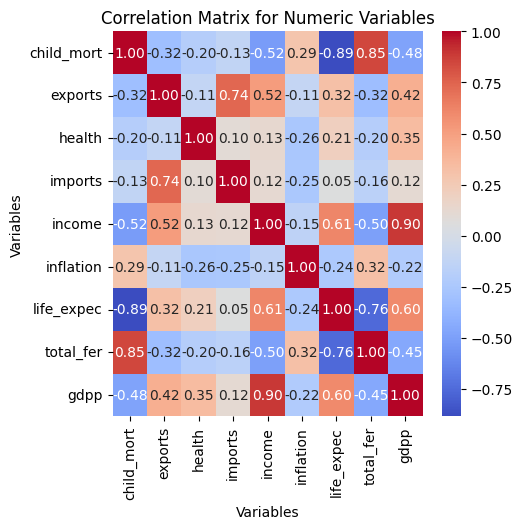

In [6]:
def plot_correlation_matrix(data):
    """
    Generate a heatmap visualization of the correlation matrix for all numeric variables in the dataset.
    
    Args:
    - data: DataFrame containing the dataset
    
    Returns:
    None
    """
    # Select only numeric columns
    numeric_data = data.select_dtypes(include='number')
    
    # Compute the correlation matrix for numeric variables
    correlation_matrix = numeric_data.corr()
    
    # Display basic statistics for numeric variables
    print("Basic Statistics for Numeric Variables:")
    print(numeric_data.describe())
    
    # Generate the heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix for Numeric Variables')
    plt.xlabel('Variables')
    plt.ylabel('Variables')
    plt.show()

# Call the function to generate the correlation matrix heatmap and display basic statistics
plot_correlation_matrix(data)


Data preprocessing :

In [7]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values, if any
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [8]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['country'])

# Display the first few rows of the encoded dataset
print(data_encoded.head())


   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  country_Afghanistan  ...  country_United Arab Emirates  \
0       5.82    553                 True  ...                         False   
1       1.65   4090                False  ...                         False   
2       2.89   4460                False  ...                         False   
3       6.16   3530                False  ...                         False   
4       2.13  12200                False  ...                         False   

   country_United Kingdom  country_United States  country_Uruguay  \
0          

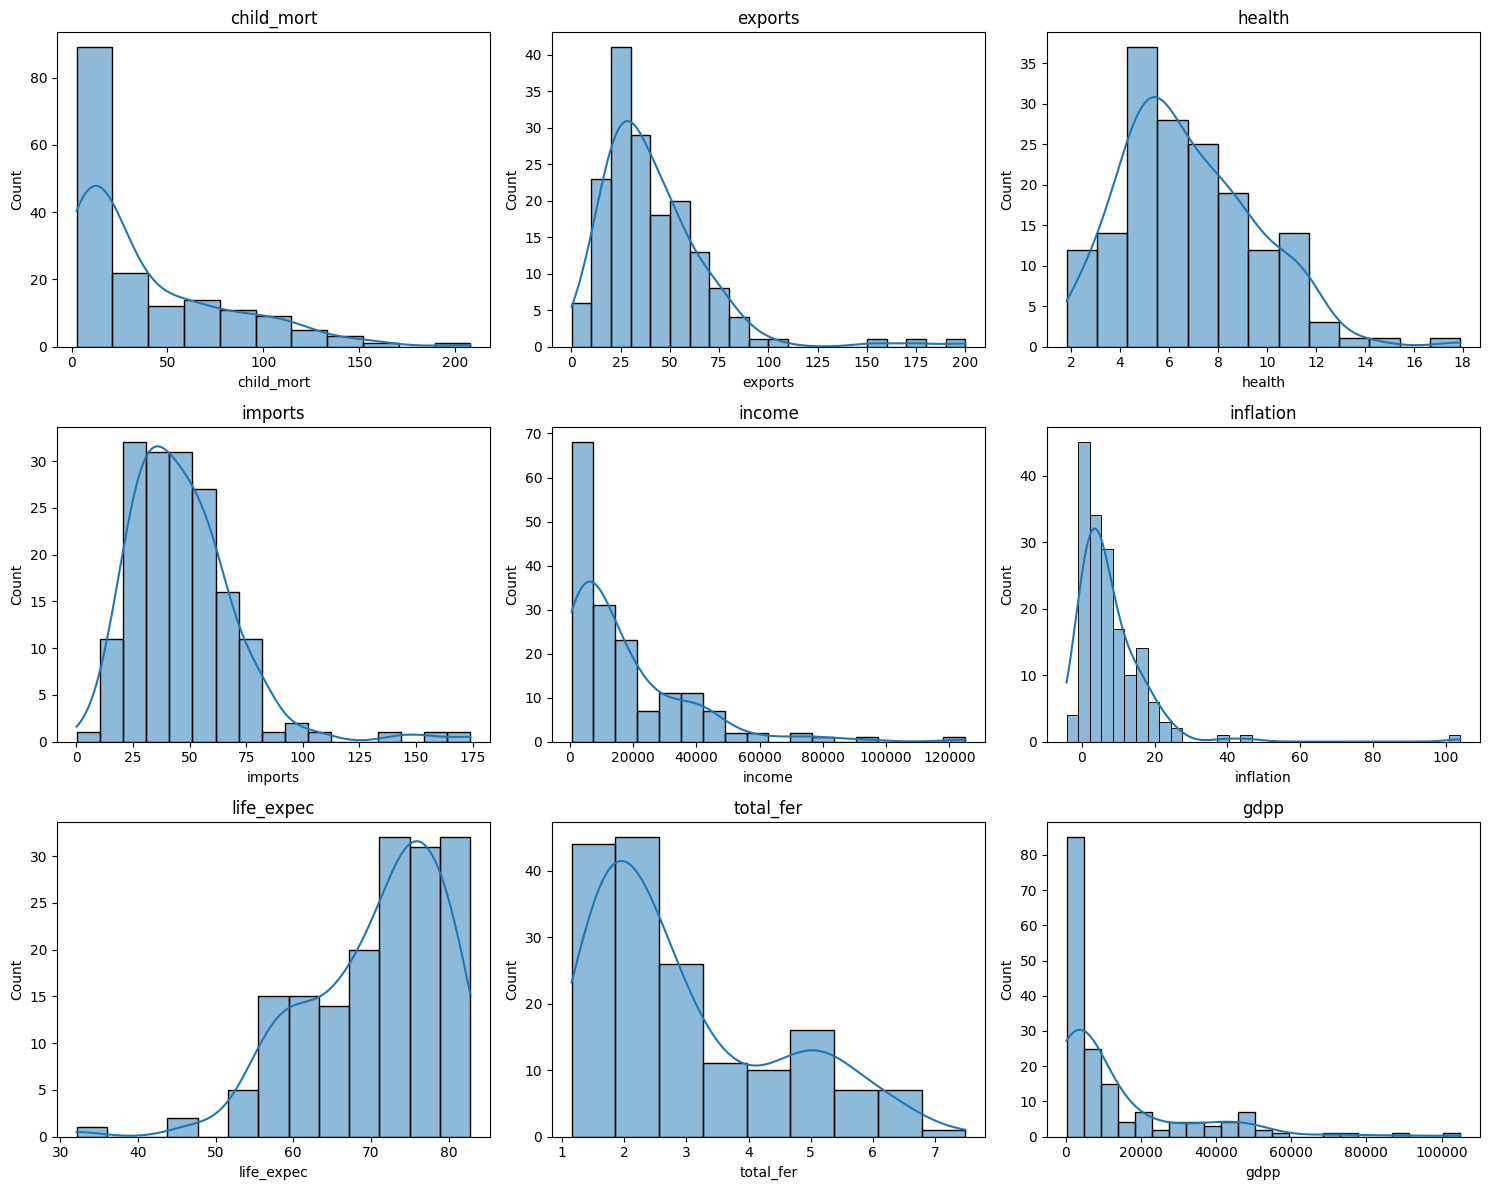

In [9]:
# Select numerical columns for plotting
numerical_columns = ['child_mort', 'exports', 'health', 'imports', 'income', 
                     'inflation', 'life_expec', 'total_fer', 'gdpp']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms with KDE for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
# Select numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate statistics
statistics = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Standard Deviation': numeric_columns.std(),
    'Kurtosis': numeric_columns.kurtosis(),
    'Skewness': numeric_columns.skew()
})

# Display statistics
print(statistics)

                    Mean   Median  Standard Deviation   Kurtosis  Skewness
child_mort     38.270060    19.30           40.328931   1.766882  1.450774
exports        41.108976    35.00           27.412010  10.138666  2.445824
health          6.815689     6.32            2.746837   0.694196  0.705746
imports        46.890215    43.30           24.209589   6.755854  1.905276
income      17144.688623  9960.00        19278.067698   7.028657  2.231480
inflation       7.781832     5.39           10.570704  41.742502  5.154049
life_expec     70.555689    73.10            8.893172   1.151591 -0.970996
total_fer       2.947964     2.41            1.513848  -0.186779  0.967092
gdpp        12964.155689  4660.00        18328.704809   5.527891  2.218051


In [11]:
# Selecting numerical columns
numerical_columns = data.columns[1:]  # Exclude the "country" column

# Standardizing numerical columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the standardized data
print(data.head())
print(data.describe())


               country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1              Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2              Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3               Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4  Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

   inflation  life_expec  total_fer      gdpp  
0   0.157336   -1.619092   1.902882 -0.679180  
1  -0.312347    0.647866  -0.859973 -0.485623  
2   0.789274    0.670423  -0.038404 -0.465376  
3   1.387054   -1.179234   2.128151 -0.516268  
4  -0.601749    0.704258  -0.541946 -0.041817  
         child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -3.722904e-17  2.127373e-16  5.504579e-16  2.765585e-16 -7.977650e-17   
std   

In [12]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Define the columns to be scaled (excluding 'country')
columns_to_scale = data.columns[1:]

# Scale the numerical columns
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
print(data_scaled.head())

               country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1              Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2              Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3               Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4  Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

   inflation  life_expec  total_fer      gdpp  
0   0.157336   -1.619092   1.902882 -0.679180  
1  -0.312347    0.647866  -0.859973 -0.485623  
2   0.789274    0.670423  -0.038404 -0.465376  
3   1.387054   -1.179234   2.128151 -0.516268  
4  -0.601749    0.704258  -0.541946 -0.041817  


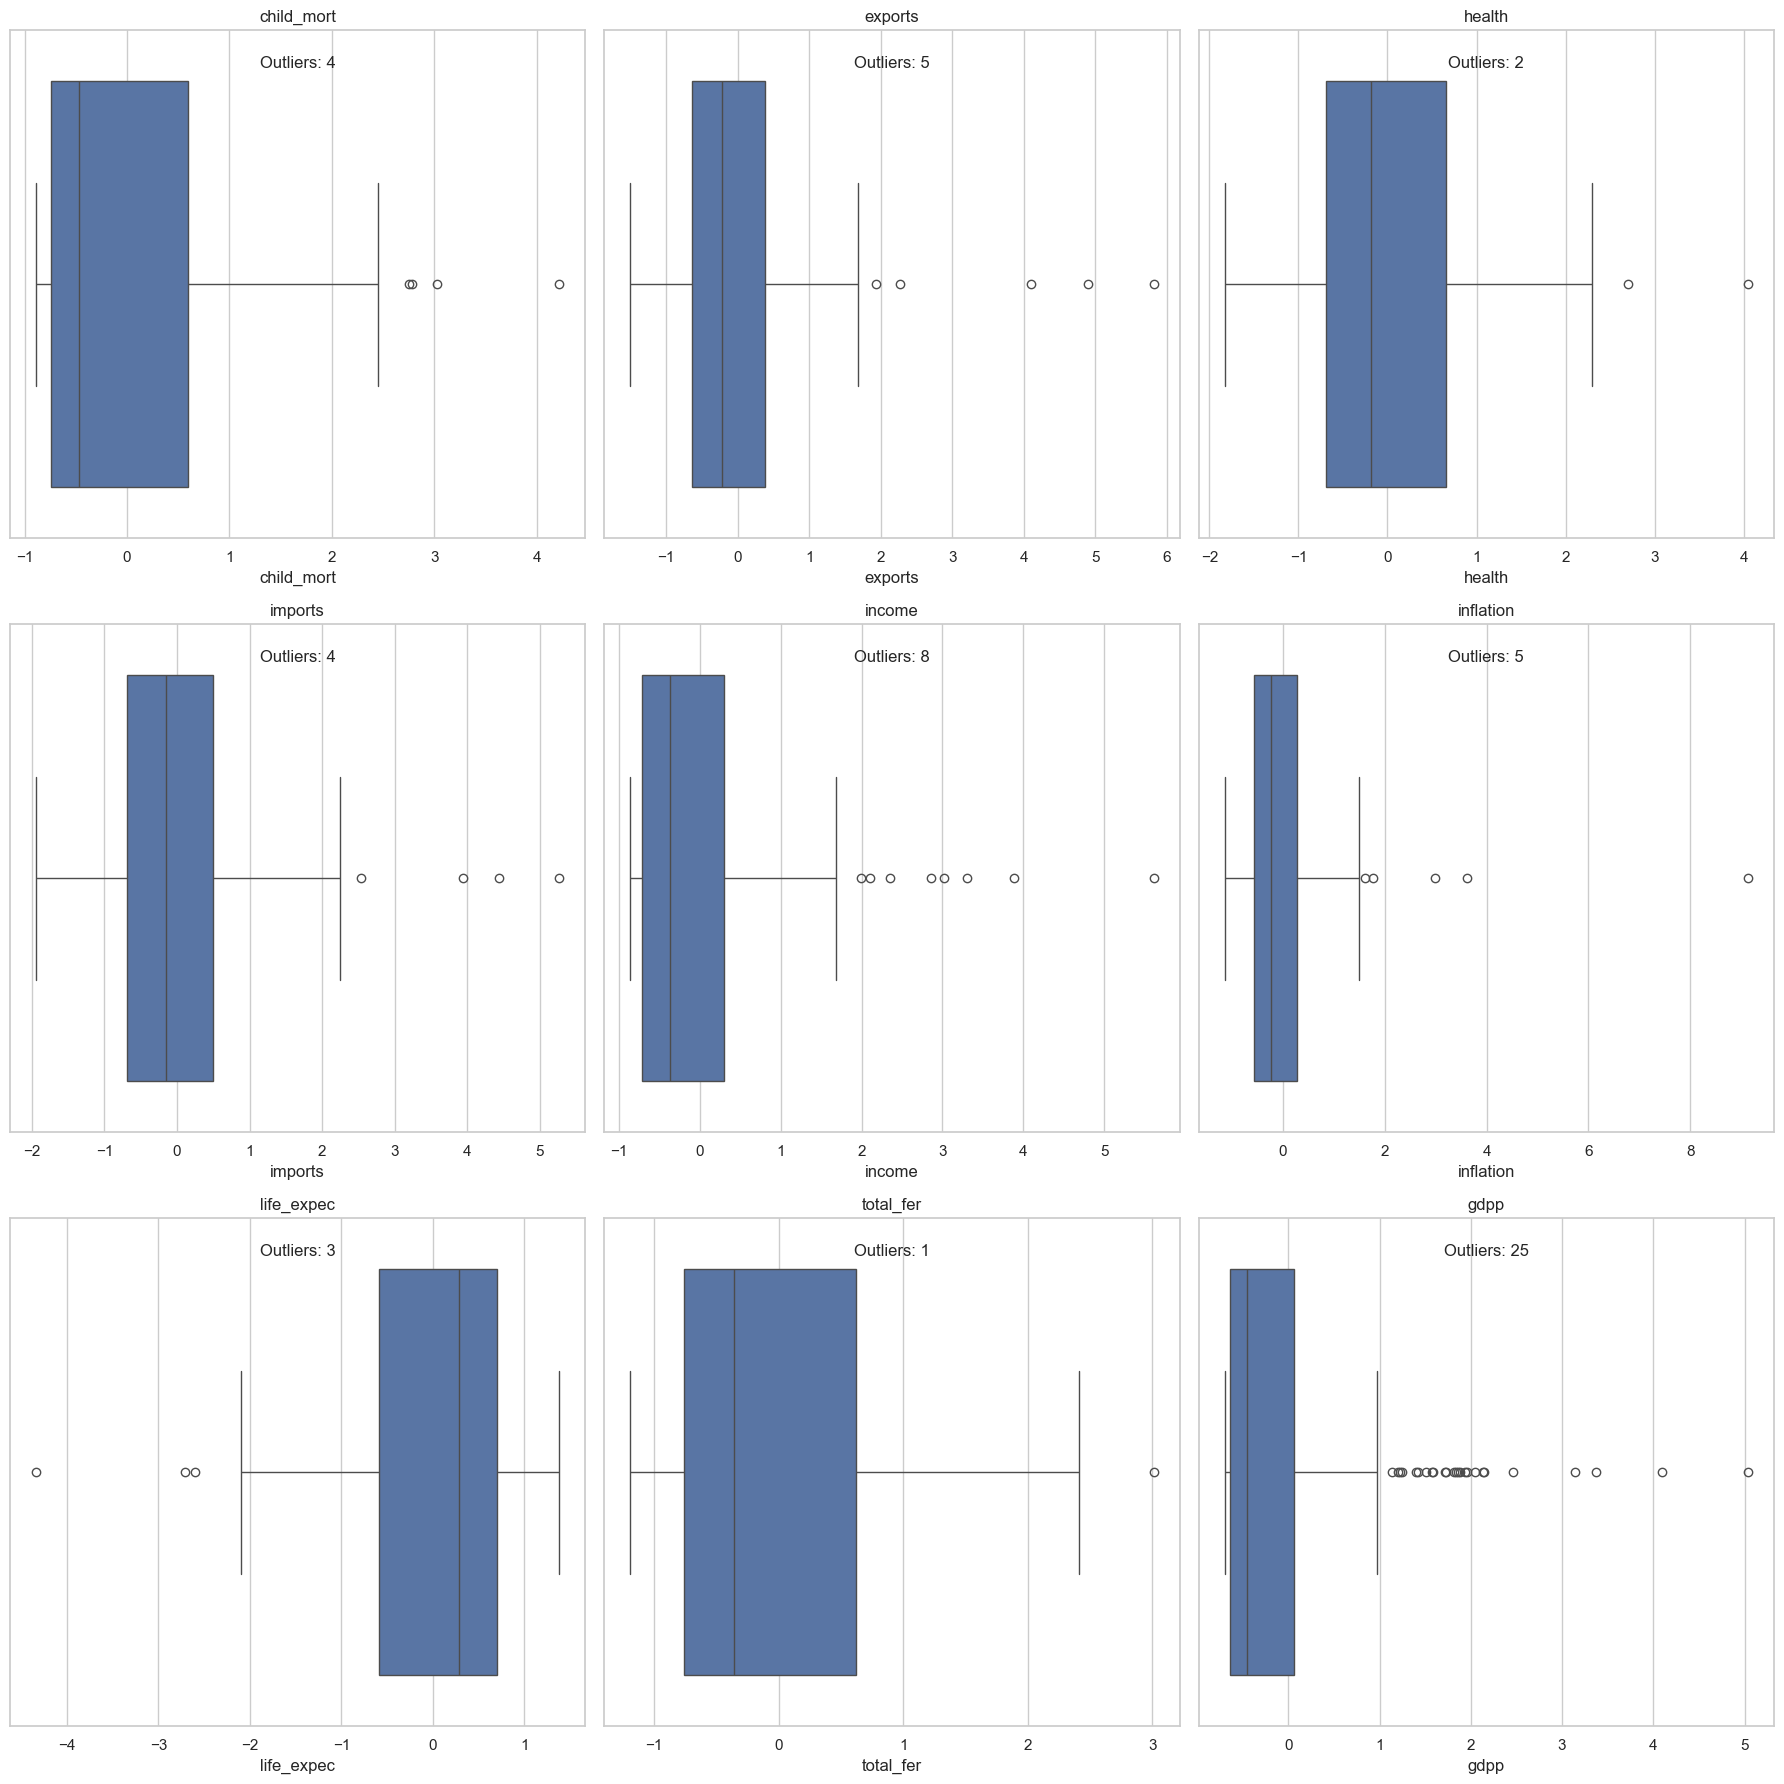

In [13]:
# Assuming 'data' is your DataFrame containing the relevant columns
sns.set(style="whitegrid")
num_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Calculate the number of plots and rows required
num_plots = len(num_cols)
num_rows = (num_plots + 2) // 3  # Assuming you want at least 3 columns and 3 rows

# Calculate the size of each plot
figsize = (6, 6)  # Adjust this as needed for larger plots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(figsize[0] * 3, figsize[1] * num_rows))

# Flatten the axes array if it's more than 1 row
if num_rows > 1:
    axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=data[col], ax=axes[i], showfliers=True)
    axes[i].set_title(col)

# Count outliers
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    num_outliers = ((data[col] < lower_whisker) | (data[col] > upper_whisker)).sum()
   
    axes[i].text(0.5, 0.95, f'Outliers: {num_outliers}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)


# Hide any remaining empty subplots
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Select only the numerical columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the IQR for each column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
data_no_outliers = data[((numeric_data >= lower_bound) & (numeric_data <= upper_bound)).all(axis=1)]

# Display the shape of the original and filtered DataFrame
print("Original data shape:", data.shape)
print("Filtered data shape:", data_no_outliers.shape)


Original data shape: (167, 10)
Filtered data shape: (128, 10)


In [15]:
print(data_no_outliers.head())
# Summary statistics
print(data_no_outliers.describe())

               country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1              Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2              Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3               Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4  Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

   inflation  life_expec  total_fer      gdpp  
0   0.157336   -1.619092   1.902882 -0.679180  
1  -0.312347    0.647866  -0.859973 -0.485623  
2   0.789274    0.670423  -0.038404 -0.465376  
3   1.387054   -1.179234   2.128151 -0.516268  
4  -0.601749    0.704258  -0.541946 -0.041817  
       child_mort     exports      health     imports      income   inflation  \
count  128.000000  128.000000  128.000000  128.000000  128.000000  128.000000   
mean     0.013161   -0.134711   -0.171872   -0.073047   -0.311902   -0.041949   


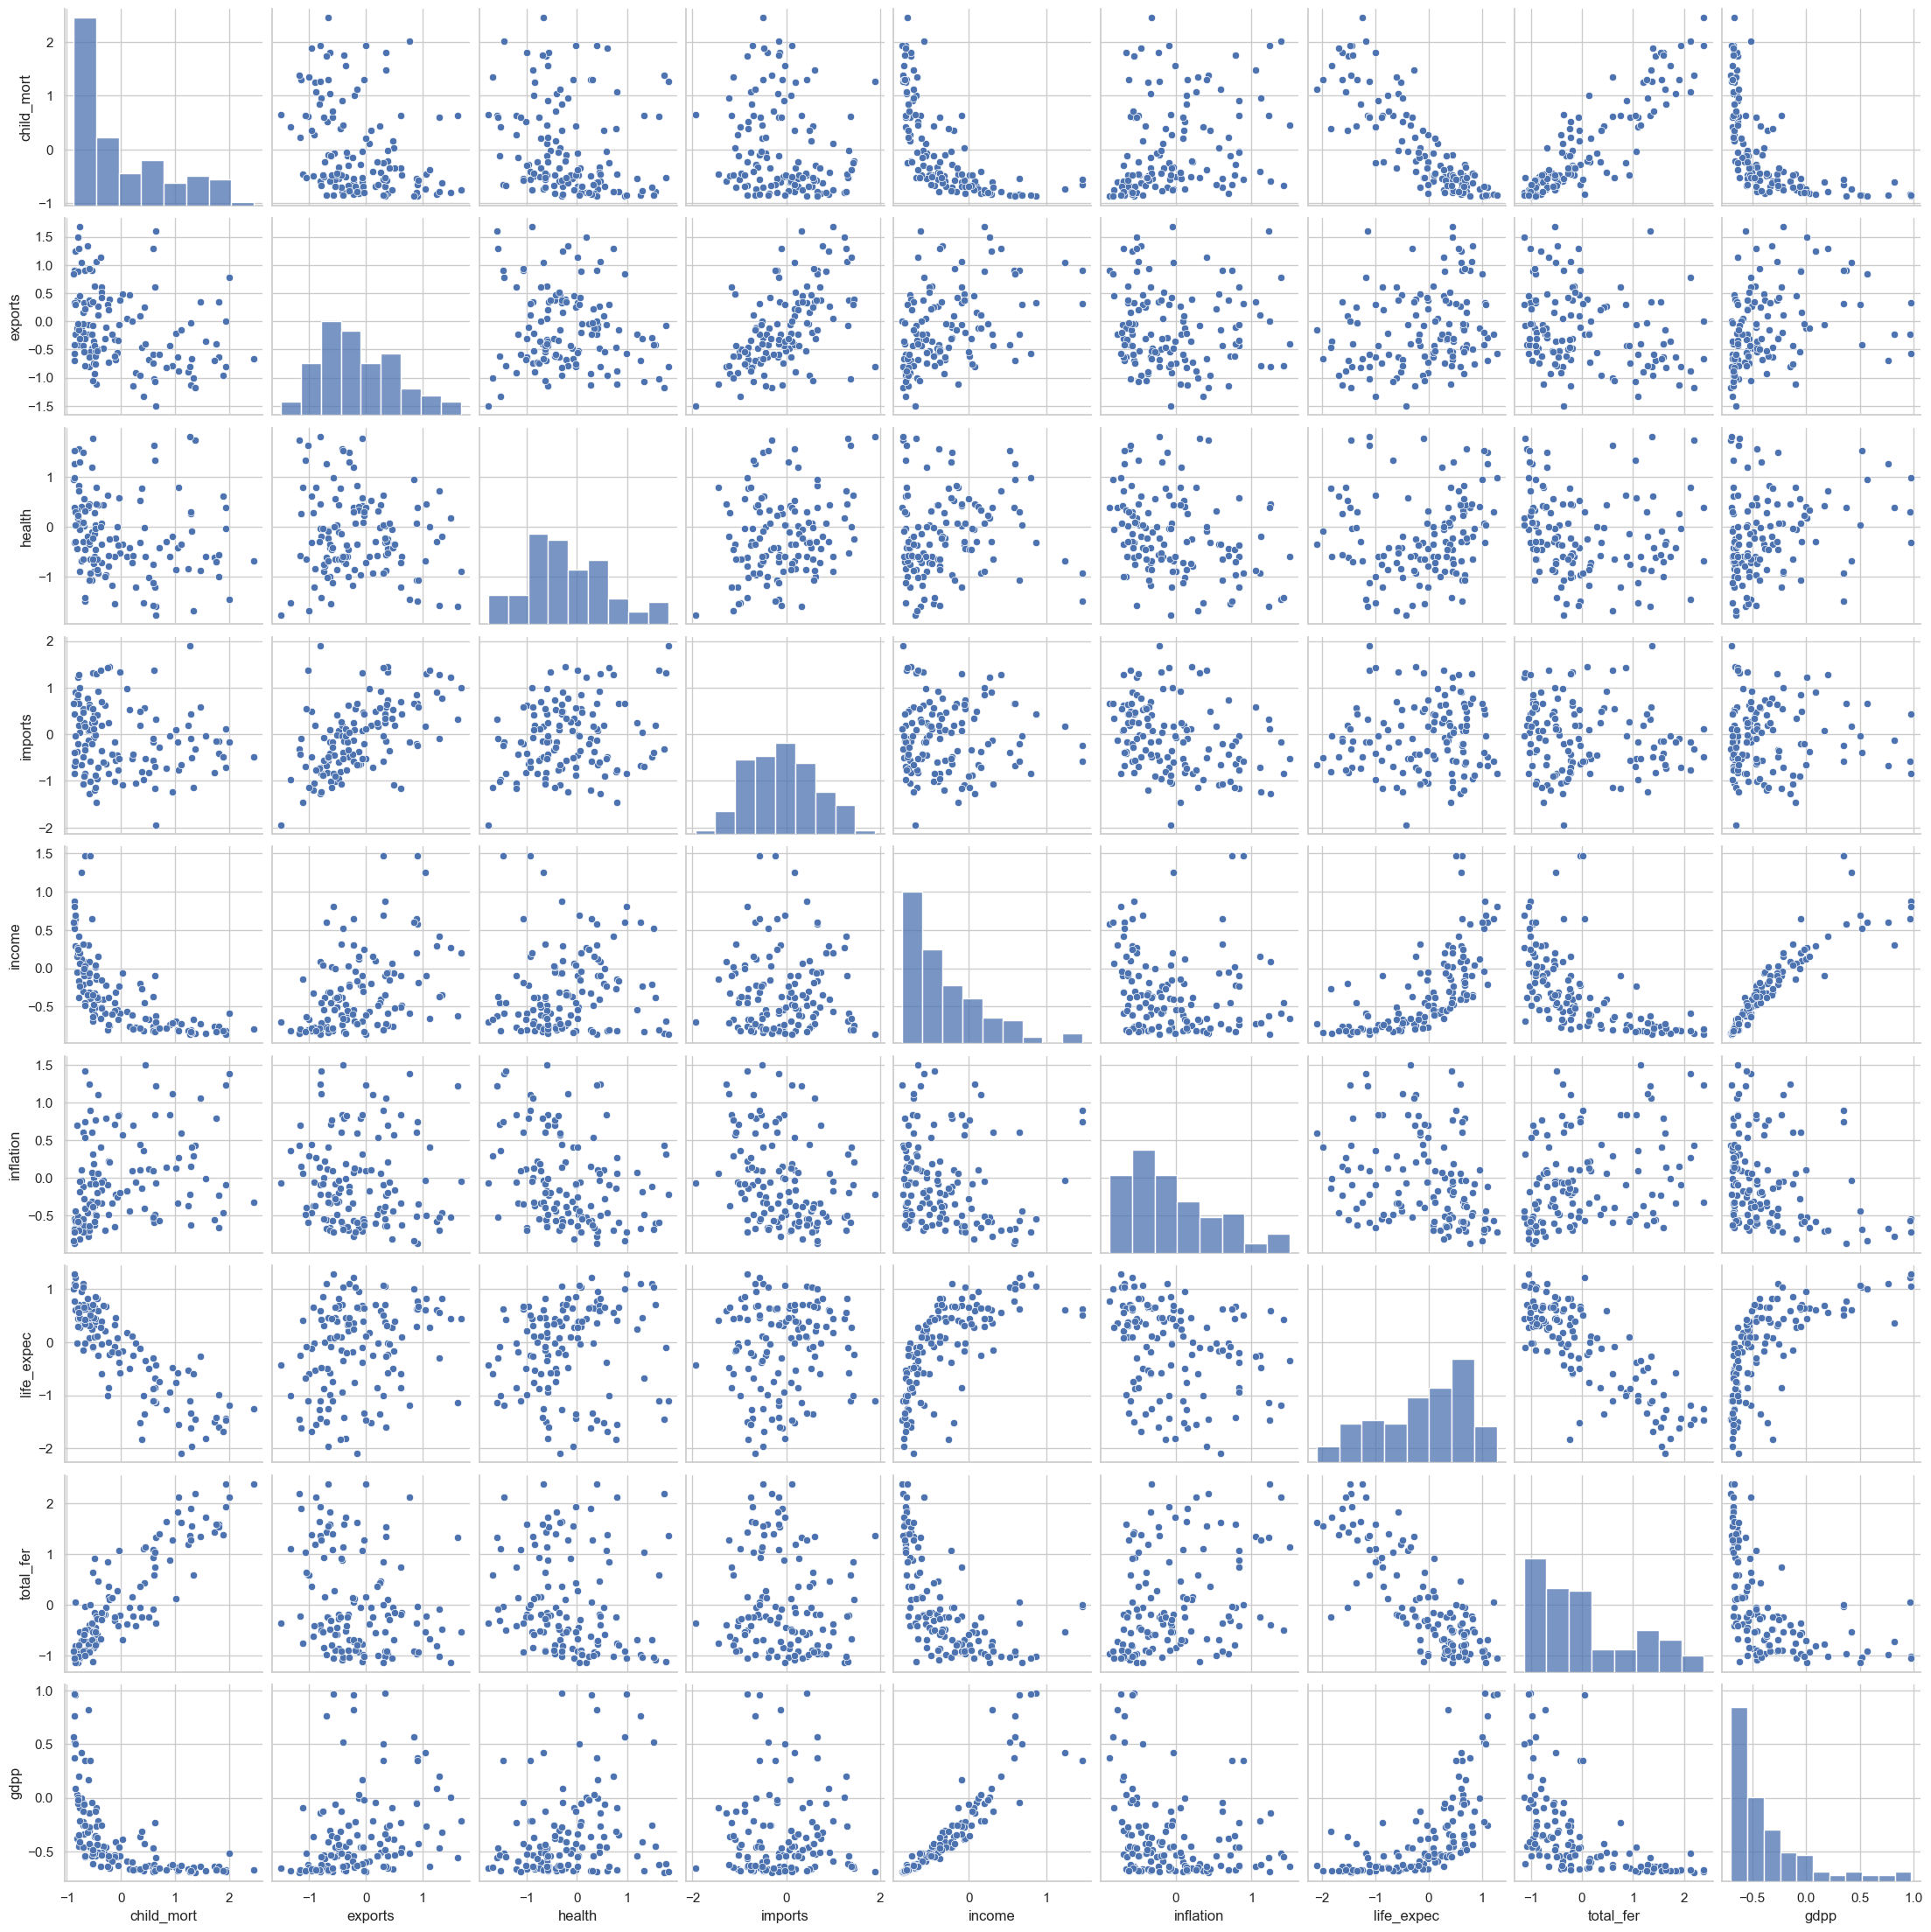

In [16]:
# Select only the numerical columns
numeric_data = data_no_outliers.select_dtypes(include=['float64', 'int64'])

# Generate pairplot
sns.pairplot(numeric_data)
plt.show()


Based on the expected relationships between the variables and their potential impact on clustering or fitting, the pair of variables that are likely to be the most suitable for fitting are (income, gdpp).

Reasons:

Strong Positive Correlation: Income and GDP per capita are highly related economic indicators, and they are expected to exhibit a strong positive correlation. This makes them suitable for fitting a linear model. Relevance to Economic Analysis: Income and GDP per capita are fundamental indicators of economic well-being and development. Fitting a model between these variables can provide insights into the economic performance of different countries. Clear Linear Relationship: A scatterplot between income and GDP per capita is expected to show a clear linear relationship, making it suitable for linear regression or line fitting. Fitting a model between income and GDP per capita can help in understanding how changes in income levels affect GDP per capita and vice versa, providing valuable insights for economic analysis and decision-making.

In [18]:
# Fitting

def perform_linear_regression(X, y):
    """
    Perform linear regression.

    Parameters:
    X (array-like): Independent variable.
    y (array-like): Dependent variable.

    Returns:
    tuple: Coefficients (slope and intercept) of the linear model.
    """
    # Convert X and y to numpy arrays if they are not already
    X = np.array(X).reshape(-1, 1)
    y = np.array(y)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Get the coefficients (slope and intercept)
    slope = model.coef_[0]
    intercept = model.intercept_

    return slope, intercept
result = perform_linear_regression(data_no_outliers['income'], data_no_outliers['gdpp'])
print(result)


(0.6937982425852135, -0.14138228967191827)


In [22]:
# Extracting independent and dependent variables from the filtered data
X_income = data_no_outliers['income']
y_gdpp = data_no_outliers['gdpp']

# Performing linear regression
slope_income, intercept_income = perform_linear_regression(X_income, y_gdpp)


# Printing the coefficients
print("Slope for income:", slope_income)
print("Intercept for income:", intercept_income)


Slope for income: 0.6937982425852135
Intercept for income: -0.14138228967191827


In [26]:
def plot_linear_regression(X, y, slope, intercept):
    """
    Plot the linear regression line along with the data points and evaluate the quality of the fit.

    Parameters:
    X (array-like): Independent variable.
    y (array-like): Dependent variable.
    slope (float): Slope of the fitted line.
    intercept (float): Intercept of the fitted line.

    Returns:
    float: R-squared value.
    array-like: Residuals.
    """
    # Fit line using all data
    line = slope * X + intercept

    # Residuals
    residuals = y - line
    # Print residuals
    print("Residuals:", residuals)
   

    # Calculate R-squared value
    r_squared = 1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2))
    # Print r_squared
    print("r_squared value to check good fit:",r_squared)

    # Plotting the data points
    plt.scatter(X, y, color='blue', label='Data points')

    # Plotting the fitted line
    plt.plot(X, line, color='red', label='Fitted line')

    # Calculating confidence interval
    x_pred = np.linspace(X.min(), X.max(), 100)
    y_pred = slope * x_pred + intercept
    y_upper = []
    y_lower = []
    for i in range(len(x_pred)):
        conf_interval = 1.96 * np.std(residuals)  # 95% confidence interval
        y_upper.append(y_pred[i] + conf_interval)
        y_lower.append(y_pred[i] - conf_interval)

    # Plotting confidence interval
    plt.fill_between(x_pred, y_lower, y_upper, color='orange', alpha=0.2, label='Confidence Interval')

    # Plotting error bars
    plt.errorbar(X, y, yerr=np.abs(residuals), fmt='none', color='green', alpha=0.5, label='Error Bars')

   
    # Adding labels and title
    plt.xlabel('Income')
    plt.ylabel('GDP per Capita')
    plt.title('Linear Regression: Income vs. GDP per Capita')

    # Adding legend
    plt.legend()

    # Displaying the plot
    plt.show()

    return r_squared, residuals


Residuals: 0      0.022962
1     -0.083811
2     -0.170772
3      0.031016
4      0.028984
         ...   
161   -0.026718
162    0.106858
164   -0.039573
165   -0.039212
166    0.012314
Length: 128, dtype: float64
r_squared value to check good fit: 0.8150144493638909


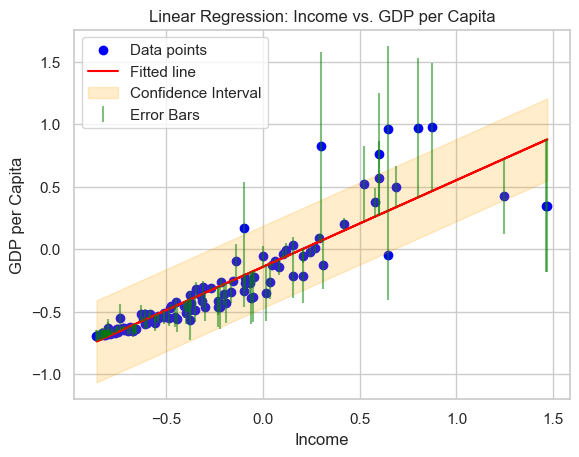

In [27]:
# Assuming X and y are defined earlier in your code
X = data_no_outliers['income']
y = data_no_outliers['gdpp']

# Plotting the linear regression line along with the data points
r_squared, residuals = plot_linear_regression(X, y, slope_income, intercept_income)


In [28]:
# Fitting prediction
# Define the linear regression function
def predict_linear_regression(X, slope, intercept):
    """
    Predict the dependent variable using the linear regression model.

    Parameters:
    X (array-like): Independent variable.
    slope (float): Slope of the fitted line.
    intercept (float): Intercept of the fitted line.

    Returns:
    array-like: Predicted values.
    """
    # Calculate predicted values using the linear regression model
    predictions = slope * X + intercept
    
    return predictions

# Generate random income values
num_synthetic_data_points = 10
random_income_values = np.random.normal(loc=0, scale=1, size=num_synthetic_data_points)

# Predict GDP per capita for each random income value
predicted_gdpp = predict_linear_regression(random_income_values, slope_income, intercept_income)

# Calculate the uncertainties associated with the predictions
prediction_uncertainty = np.std(predicted_gdpp)

# Display the predicted GDP per capita and its uncertainty
for i in range(num_synthetic_data_points):
    print("Predicted GDP per capita:", predicted_gdpp[i])
print("Uncertainty:", prediction_uncertainty)


Predicted GDP per capita: -0.21085355310945736
Predicted GDP per capita: -0.318582014755759
Predicted GDP per capita: -0.47452115675756534
Predicted GDP per capita: -0.5001224739430162
Predicted GDP per capita: -0.5025693885021417
Predicted GDP per capita: 0.4691558556583766
Predicted GDP per capita: -0.5442456606506119
Predicted GDP per capita: 0.3926444471193953
Predicted GDP per capita: -0.15427215680281905
Predicted GDP per capita: 0.47692874017245335
Uncertainty: 0.40110454516798294


In [29]:
def perform_clustering(data, num_clusters):
    """
    Perform K-means clustering on the provided dataset.

    Parameters:
    - data: DataFrame or array containing the dataset for clustering
    - num_clusters: Number of clusters to create

    Returns:
    - cluster_labels: Cluster labels assigned to each data point
    - cluster_centers: Coordinates of cluster centers
    """
    # Initialize KMeans model with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    
    # Fit KMeans model to the data
    kmeans.fit(data)
    
    # Get the cluster labels for each data point
    cluster_labels = kmeans.labels_
    
    # Get the coordinates of cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    return cluster_labels, cluster_centers


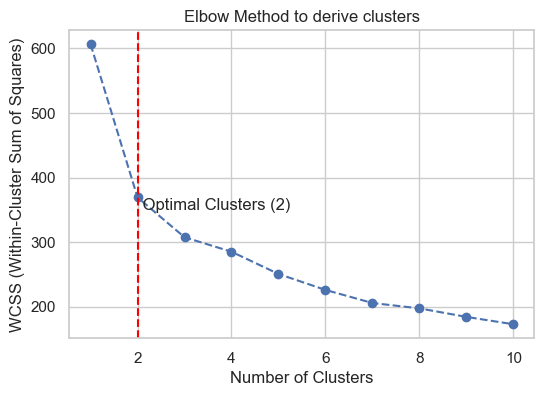

In [30]:
# Assuming you have already preprocessed the data and removed outliers
# Define the numerical dataset without outliers
numeric_data_no_outliers = data_no_outliers.drop(columns=['country'])

# Initialize a range of potential number of clusters
max_clusters = 10
wcss = []  # within-cluster sum of squares
silhouette_scores = []

# Fit KMeans with different numbers of clusters
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(numeric_data_no_outliers)
    
    # Calculate WCSS
    wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score (for num_clusters > 1)
    if i > 1:
        cluster_labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(numeric_data_no_outliers, cluster_labels))

# Plot the Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to derive clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

# Mark the optimal number of clusters on the plot
optimal_clusters = 2  
plt.axvline(x=optimal_clusters, color='red', linestyle='--', label='Optimal Clusters')
plt.text(optimal_clusters, wcss[optimal_clusters - 1], f' Optimal Clusters ({optimal_clusters})', 
         verticalalignment='top', horizontalalignment='left')

plt.grid(True)
plt.show()



In [31]:
# List to store silhouette scores
silhouette_scores = []

# Define range of clusters to try
num_clusters_range = range(2, 11)  # Trying clusters from 2 to 10

# Iterate over the range of clusters
for num_clusters in num_clusters_range:
    # Instantiate KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(numeric_data_no_outliers)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(numeric_data_no_outliers, cluster_labels)
    
    # Append silhouette score to list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters based on silhouette score
optimal_num_clusters = num_clusters_range[silhouette_scores.index(max(silhouette_scores))]

print("Optimal number of clusters (Silhouette Score):", optimal_num_clusters)


Optimal number of clusters (Silhouette Score): 2


Cluster labels: [1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1]


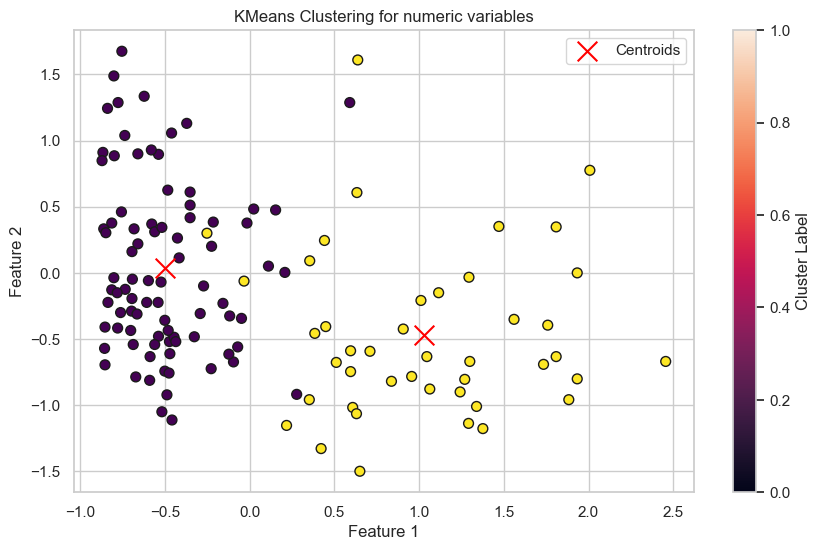

In [37]:
# Remove non-numeric columns before clustering
numeric_data_no_outliers = data_no_outliers.drop(columns=['country'])

# Convert DataFrame to numpy array
numeric_data_array = numeric_data_no_outliers.values

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(numeric_data_array)
centroids = kmeans.cluster_centers_

# Display the cluster labels
print("Cluster labels:", cluster_labels)

plt.figure(figsize=(10, 6))
plt.scatter(numeric_data_array[:, 0], numeric_data_array[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering for numeric variables')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()


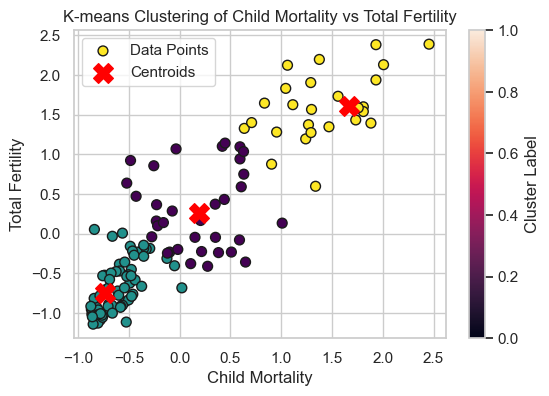

C:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


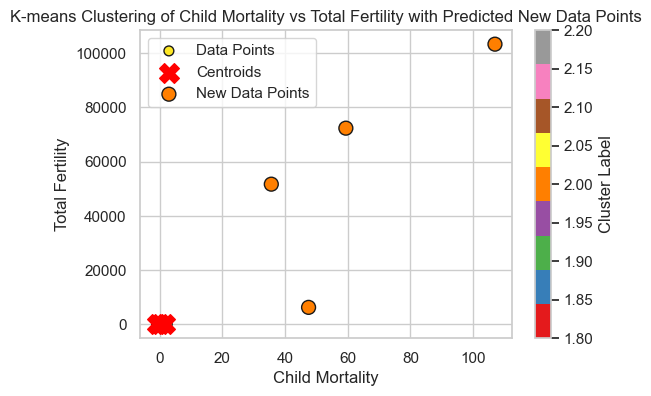

Predicted cluster labels for new data points: [2 2 2 2]


In [40]:
# Select the columns for clustering
features = ['child_mort', 'total_fer']
data_for_clustering = data_no_outliers[features]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Instantiate KMeans with the desired number of clusters
num_clusters = 3  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the scaled data
kmeans.fit(scaled_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame using .loc
data_no_outliers.loc[:, 'cluster_label'] = cluster_labels
# Calculate the centroids
centroids = kmeans.cluster_centers_
# Visualize the clusters
plt.figure(figsize=(6, 4))
plt.scatter(data_no_outliers['child_mort'], data_no_outliers['total_fer'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50,label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.xlabel('Child Mortality')
plt.ylabel('Total Fertility')
plt.title('K-means Clustering of Child Mortality vs Total Fertility')
plt.colorbar(label='Cluster Label')
plt.legend()  # Add legend for centroids
plt.grid(True)
plt.show()
# Sample new data points
X_new = np.array([[30, 50000], [40, 6000], [50, 70000], [90, 100000]])

# Scale the new data using the same scaler object
scaled_X_new = scaler.transform(X_new)

# Predict cluster labels for the new data points
predicted_labels = kmeans.predict(scaled_X_new)

# Visualize the clusters with the new data points and their predicted labels
plt.figure(figsize=(6, 4))
plt.scatter(data_no_outliers['child_mort'], data_no_outliers['total_fer'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.scatter(scaled_X_new[:, 0], scaled_X_new[:, 1], c=predicted_labels, cmap='Set1', marker='o', edgecolor='k', s=100, label='New Data Points')
plt.xlabel('Child Mortality')
plt.ylabel('Total Fertility')
plt.title('K-means Clustering of Child Mortality vs Total Fertility with Predicted New Data Points')
plt.colorbar(label='Cluster Label')
plt.legend()  # Add legend for centroids and new data points
plt.grid(True)
plt.show()

# Display the predicted cluster labels for the new data points
print("Predicted cluster labels for new data points:", predicted_labels)
